Install atau import library untuk vader sentiment analysis. Keterangan: google colabs untuk syntax di Linux terminal pake tanda seru

In [1]:
# Install vaderSentiment package for VADER
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


Import library:
pandas : library untuk manipulasi tabel
numpy : library untuk manipulasi array, matrix
sklearn : library untuk machine learning


In [18]:
# Data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib untuk visualisasi data


# Import VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score

# Set a wider colwith
pd.set_option('display.max_colwidth', 1000) #pengaturan display

Jika jupiter notebook, file atau data diletakan di folder lokal (komputer). Untuk google colabs, file atau data itu diletakan di google drive

In [3]:
# Mount Google Drive (untuk mengkoneksikan dengan google drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kita pindah ke lokasi folder dimana terletak file yang ingin kita baca (untuk file google colab nya (.ipynb) letaknya dibawah folder Colab Notebooks)

In [4]:
# Change directory
import os
os.chdir("./drive/My Drive/NLP2023/")

In [ ]:
# Print out the current directory
!pwd

/content/drive/My Drive/NLP2023


Sebelum lanjut download datanya dan masukan atau upload ke folder diatas. Datanya ada di github saya: https://github.com/zulkaidaakbar/NLP-STTCipasung2022/tree/main/27-September-2022/VaderSentimentAnalysis

Mengambil data dari google drive kemudian membaca nya (data dalam bentuk text) lalu kita ubah format nya menjadi format tabel menggunakan library pandas

In [5]:
# Read in data
imdb_review = pd.read_csv('imdb_labelled.txt', sep='\t', names=['review', 'label'])

Kita intip datanya

In [6]:
# Take a look at the data
imdb_review.head(10)

,review,label
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1
5,"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",0
6,Wasted two hours.,0
7,"Saw the movie today and thought it was a good effort, good messages for kids.",1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the science teacher.,1


Cari tahu info umum tentang dataset

In [7]:
# Get the dataset information (command .info) -> ternyata ada 1000 entries (1000 reviews)
imdb_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  748 non-null    object
 1   label   748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [8]:
# cek distribusi sentiment positif dan sentiment negative (dari kolom label)
# Check the label distribution
imdb_review['label'].value_counts()

1    386
0    362
Name: label, dtype: int64

Vader adalah library untuk mengetahui sentimen (positif atau negative) dari kalimat atau teks. Vader akan mengeluarkan nilai dari -1 (sangat negative) atau +1 (sentimennya sangat positif). Dibawah ini adalah contoh penggunaan Vader

In [9]:
# Example text
#text = 'GrabNGoInfo.com is a great machine learning tutorial website.'
text = 'The products are expensive and not good'

# VADER Sentiment
vader = SentimentIntensityAnalyzer() #inisilaisasi vader
vader_sentiment = vader.polarity_scores(text) #jalankan vader mengetahui polarity score untuk variabel text


Kita printout hasilnya:
1. Kecenderungan negatif
2. Kecenderungan netral
3. Kecenderungan positif
4. Sentimen keseluruhan (compound score). Ini adalah score total dan biasanya score ini yang digunakan

In [10]:
vader_sentiment # print out hasil score nya

{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.3412}

Karena compound score -0.3412 (negative) oleh karena text diatas sentimen nya negative (jelek)

In [11]:
vader_sentiment['compound'] # untuk print compund score nya saja

-0.3412

Sekarang kita lanjut pakai vader sentiment analysis untuk keseluruhan database

In [13]:
# Get sentiment score for each review
vader_sentiment = SentimentIntensityAnalyzer() #initialisasi
imdb_review['scores_VADER'] = imdb_review['review'].apply(lambda s: vader_sentiment.polarity_scores(s)['compound']) #mengambil compound score untuk masing2 review, lalu diletakan di kolom baru bernama 'SCORES_VADER'

kita lihat tabel yang baru, bandingkan dengan table lama

In [14]:
imdb_review.head(10)

,review,label,scores_VADER
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,-0.4215
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,-0.5507
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0,-0.7178
3,Very little music or anything to speak of.,0,0.0000
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1,0.6369
5,"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",0,-0.2500
6,Wasted two hours.,0,-0.4939
7,"Saw the movie today and thought it was a good effort, good messages for kids.",1,0.7003
8,A bit predictable.,0,0.0000
9,Loved the casting of Jimmy Buffet as the science teacher.,1,0.5994


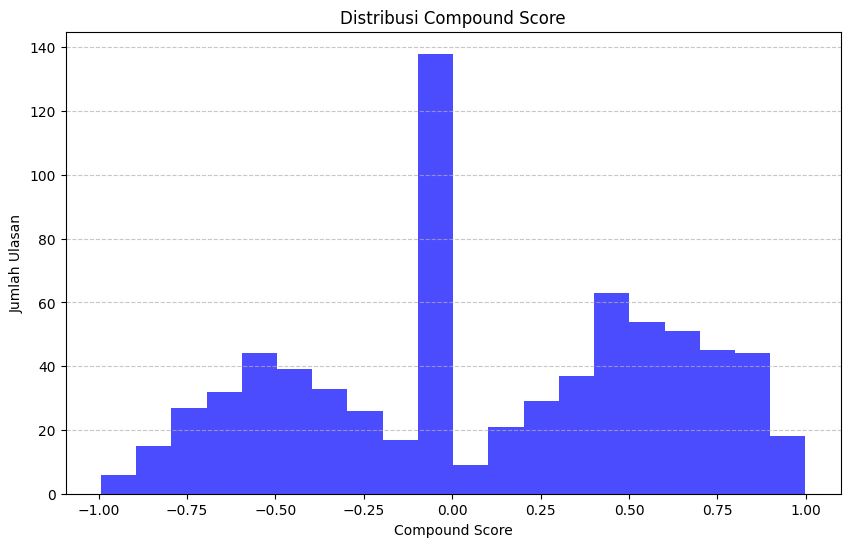

In [24]:
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot
plt.hist(imdb_review['scores_VADER'], bins=20, color='blue', alpha=0.7)  # Membuat histogram dengan 20 bins, warna biru, dan transparansi
plt.xlabel('Compound Score')  # Label sumbu x
plt.ylabel('Jumlah Ulasan')  # Label sumbu y
plt.title('Distribusi Compound Score')  # Judul plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid pada sumbu y dengan garis putus-putus
plt.show()  # Menampilkan plot histogram

Saya ingin bukan compound score nya tapi cuman apakah sentimen nya positif atau negative. Coding dibawah ini untuk mengassign kalau score dibawah nol berarti negative dan dikasih label 0 dan jika compound score nya diatas nol berarti sentiment positive dan dikasih label 1

In [15]:
# mengassign positive (1) atau negative (0) berdasar nilai scores_vader dan diletakan di kolom baru 'pred_VADER'
imdb_review['pred_VADER'] = imdb_review['scores_VADER'].apply(lambda x: 1 if x >=0 else 0)
imdb_review.head(10)

,review,label,scores_VADER,pred_VADER
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,-0.4215,0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,-0.5507,0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0,-0.7178,0
3,Very little music or anything to speak of.,0,0.0000,1
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1,0.6369,1
5,"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",0,-0.2500,0
6,Wasted two hours.,0,-0.4939,0
7,"Saw the movie today and thought it was a good effort, good messages for kids.",1,0.7003,1
8,A bit predictable.,0,0.0000,1
9,Loved the casting of Jimmy Buffet as the science teacher.,1,0.5994,1


Bisa kita lihat mayoritas cocok antara 'pred_VADER' dengan label manual 'label'

Oleh karena itu kita ingin menghitung berapa persen akurasi dari Vader sentiment analysis. Yaitu seberapa besar cocok dengan manual label

In [25]:
# Compare Actual and Predicted
accuracy_score(imdb_review['label'],imdb_review['pred_VADER'])

0.7767379679144385

Accuracy nya ternyata 76,8 %

In [ ]:
!pwd


/content/drive/MyDrive/NLP2023
